In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler#range from 0 to 1


In [3]:
data = pd.read_csv("framingham.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Missing Values

In [6]:
null_values = data.isnull().sum().sort_values(ascending = False)
null_values = null_values[null_values > 0]
null_values

glucose       388
education     105
BPMeds         53
totChol        50
cigsPerDay     29
BMI            19
heartRate       1
dtype: int64

In [8]:
null_per = null_values / data.shape[0] * 100
null_per

glucose       9.150943
education     2.476415
BPMeds        1.250000
totChol       1.179245
cigsPerDay    0.683962
BMI           0.448113
heartRate     0.023585
dtype: float64

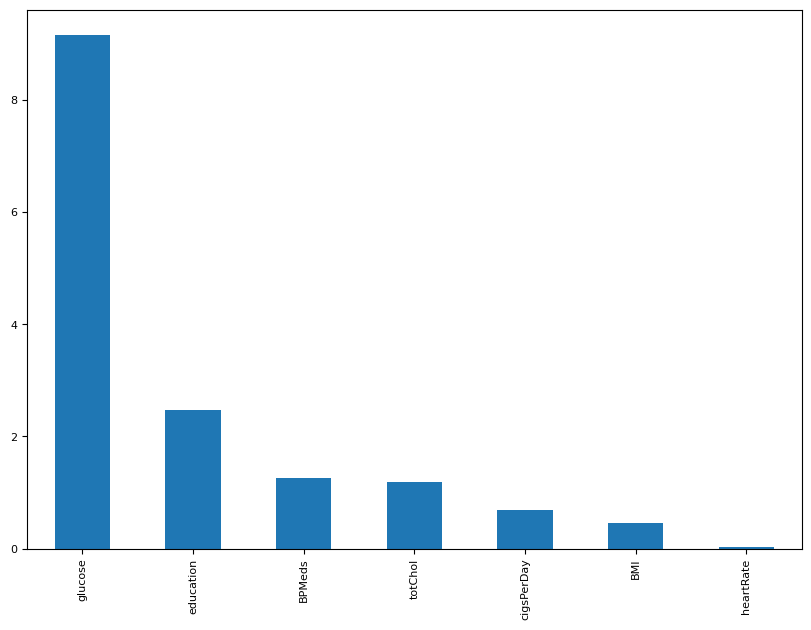

In [10]:
null_per.plot(kind = "bar" , figsize = [10,7] , fontsize = 8);

In [12]:
data.dropna(axis=0,inplace=True)

In [14]:
data.shape

(3658, 16)

# Skweed Data

In [17]:
numerical_features=data.drop(['male','currentSmoker','prevalentStroke','prevalentHyp','diabetes','TenYearCHD'],axis=1).columns

In [19]:
numerical_features

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP',
       'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [21]:
data[numerical_features].skew().sort_values(ascending=False)

glucose       6.281911
BPMeds        5.478217
cigsPerDay    1.228866
sysBP         1.163611
BMI           0.999606
diaBP         0.709407
education     0.688616
heartRate     0.670839
totChol       0.664334
age           0.232006
dtype: float64

In [23]:
high_skew = []
for i in numerical_features:
    if abs(data[i].skew()) > 1:
        high_skew.append(i)
high_skew

['cigsPerDay', 'BPMeds', 'sysBP', 'glucose']

C:\Users\acer\AppData\Local\Temp\ipykernel_5136\1494472868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[high_skew[i]])
C:\Users\acer\AppData\Local\Temp\ipykernel_5136\1494472868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[high_skew[i]])
C:\Users\acer\AppData\Local\Temp\i

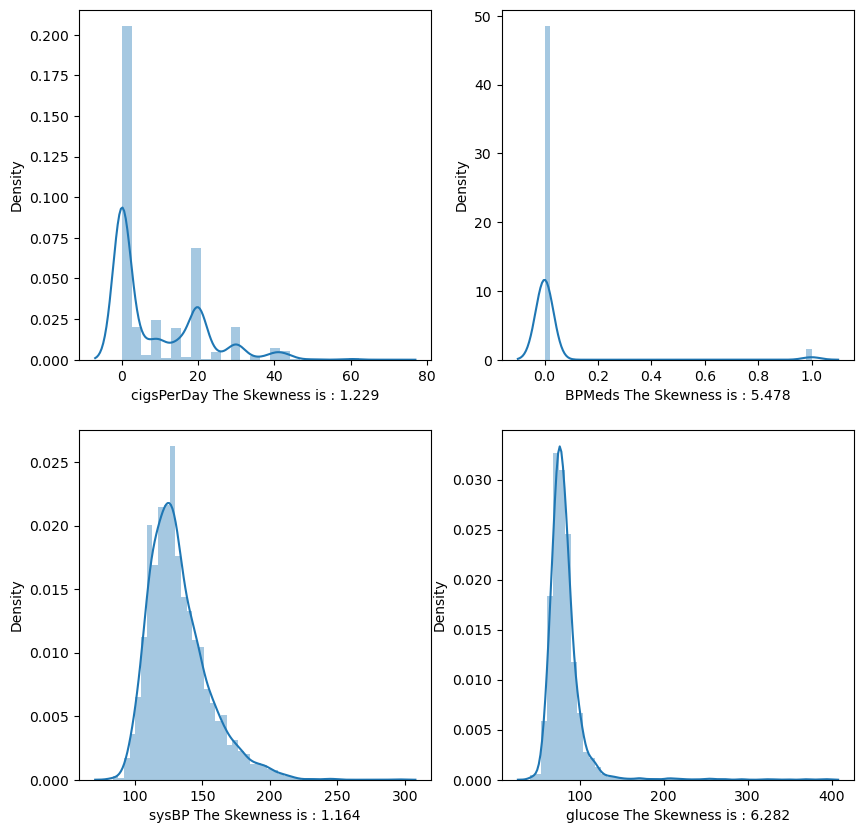

In [25]:
plt.figure(figsize = [10 , 10])

for i in range(len(high_skew)):
    plt.subplot(2 , 2 , i + 1)
    sns.distplot(data[high_skew[i]])
    skewness = data[high_skew[i]].skew()
    plt.xlabel(high_skew[i] + " The Skewness is : " + str(round(skewness,3)));

In [27]:
for i in range(len(high_skew)):
    data[high_skew[i]] = np.log1p(data[high_skew[i]])

C:\Users\acer\AppData\Local\Temp\ipykernel_5136\1494472868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[high_skew[i]])
C:\Users\acer\AppData\Local\Temp\ipykernel_5136\1494472868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[high_skew[i]])
C:\Users\acer\AppData\Local\Temp\i

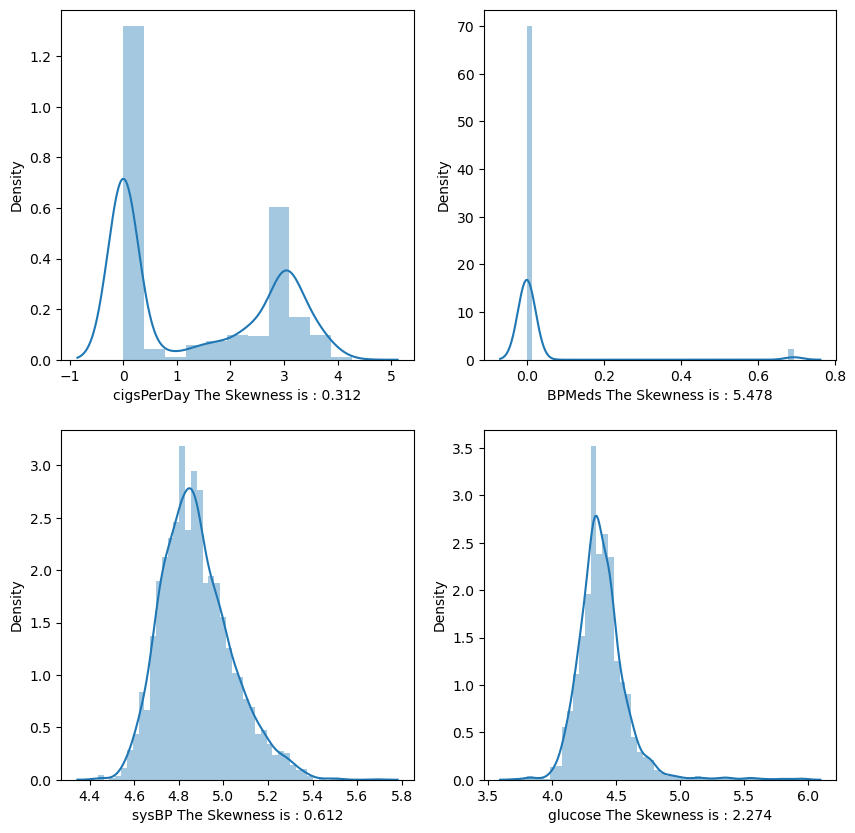

In [29]:
plt.figure(figsize = [10 , 10])

for i in range(len(high_skew)):
    plt.subplot(2 , 2 , i + 1)
    sns.distplot(data[high_skew[i]])
    skewness = data[high_skew[i]].skew()
    plt.xlabel(high_skew[i] + " The Skewness is : " + str(round(skewness,3)));

# Feature Selection using Chi Square (Category)

The Chi-Square test is a statistical method used to assess the association between categorical variables by comparing observed frequencies to expected frequencies to determine if deviations from the expectation are significant.

In [33]:
categorical_features=data[['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']]

In [35]:
categorical_features

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,1,0,0.0,0,0,0
1,0,0,0.0,0,0,0
2,1,1,0.0,0,0,0
3,0,1,0.0,0,1,0
4,0,1,0.0,0,0,0
...,...,...,...,...,...,...
4233,1,1,0.0,0,1,0
4234,1,1,0.0,0,0,0
4237,0,0,0.0,0,0,0
4238,1,0,0.0,0,1,0


In [37]:
from sklearn.feature_selection import chi2
x = categorical_features
y = data['TenYearCHD']

In [38]:
chi_scores = chi2(x, y)

In [41]:
chi_scores

(array([17.10775088,  0.68647384, 19.54090634,  8.5078328 , 82.84545536,
        31.06762071]),
 array([3.53178759e-05, 4.07366355e-01, 9.84683480e-06, 3.53620967e-03,
        8.87260079e-20, 2.49193807e-08]))

<Axes: >

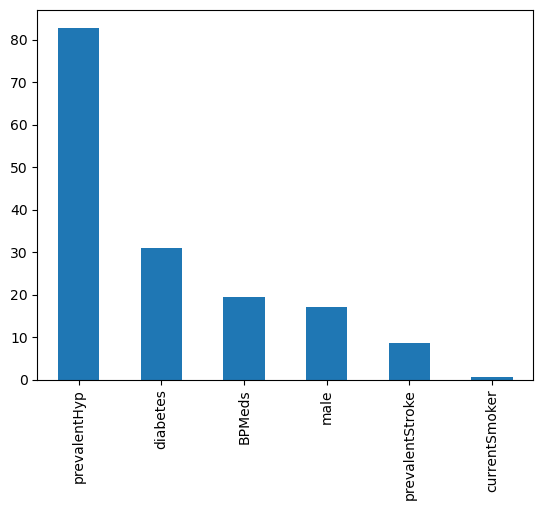

In [43]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=x.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

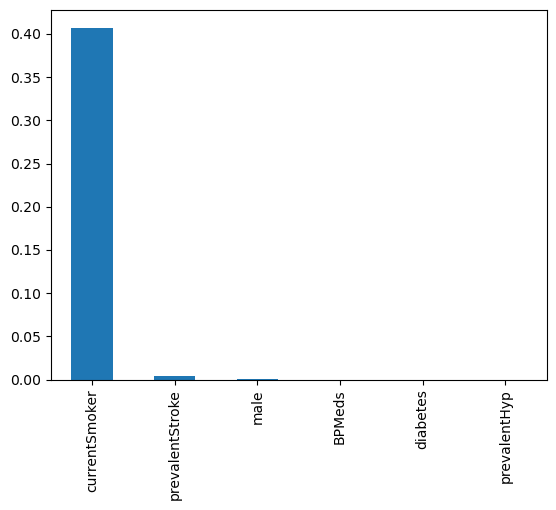

In [45]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=x.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [47]:
data_features = data.drop(['currentSmoker'], axis=1)
data_features.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.000000,0.0,0,0,0,195.0,4.672829,70.0,26.97,80.0,4.356709,0
1,0,46,2.0,0.000000,0.0,0,0,0,250.0,4.804021,81.0,28.73,95.0,4.343805,0
2,1,48,1.0,3.044522,0.0,0,0,0,245.0,4.855929,80.0,25.34,75.0,4.262680,0
3,0,61,3.0,3.433987,0.0,0,1,0,225.0,5.017280,95.0,28.58,65.0,4.644391,1
4,0,46,3.0,3.178054,0.0,0,0,0,285.0,4.875197,84.0,23.10,85.0,4.454347,0


In this dataset, the p-value for the 'is_smoking' feature is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that this feature is not statistically significant for our analysis.

# SMOTE

SMOTE(Synthetic Minority Oversampling Technique) generates synthetic samples for the minority class samples to balance imbalanced datasets
and it does that by finding its k-nearest neighbors, and generating new points along the lines connecting it to one or more of these neighbors

In [52]:
x = data_features.iloc[:, 0:14]
y = data_features.iloc[:, 14]

In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [56]:
# The numbers before SMOTE
num_before = dict(Counter(y))

# Perform SMOTE
# Define Pipeline
over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.8)
steps=[("o",over),("u",under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_smote,y_smote=pipeline.fit_resample(x,y)

# The numbers after SMOTE
num_after=dict(Counter(y_smote))

In [58]:
print(num_before,num_after)

{0: 3101, 1: 557} {0: 3100, 1: 2480}


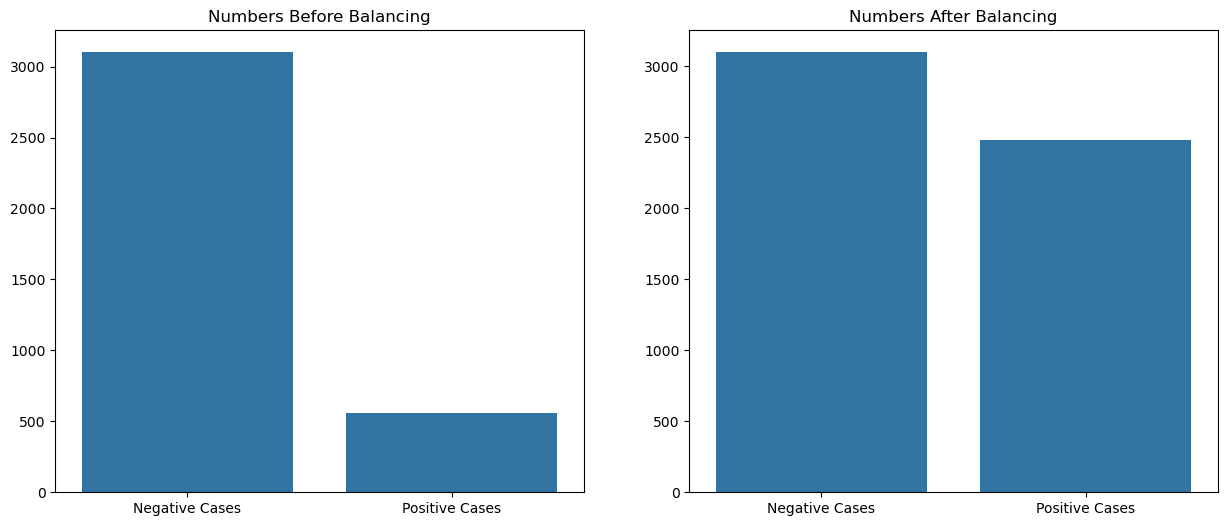

In [60]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [62]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age','education' ,'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
'diabetes', 'totChol', 'sysBP', 'diaBP','BMI', 'heartRate', 'glucose', 'TenYearCHD']
new_data.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2107,1,48,3.0,3.044522,0.0,0,0,0,187.0,4.634729,69.0,24.24,68.0,4.290459,0
1730,1,45,1.0,1.386294,0.0,0,0,0,280.0,4.859812,82.0,29.17,60.0,4.143135,0
2747,0,49,1.0,0.000000,0.0,0,0,0,224.0,4.948760,88.0,23.79,80.0,4.465908,0
364,0,52,1.0,3.258097,0.0,0,0,0,235.0,4.787492,82.0,24.25,77.0,4.382027,0
3249,0,55,1.0,0.000000,0.0,0,0,0,204.0,4.620059,62.0,29.44,82.0,4.488636,0


# scaling the data

Standard Scaling transforms features to have a mean of 0 and a standard deviation of 1, helping to normalize data by removing the influence of differing units or scales, which improves model performance.

In [66]:
X_new = new_data.iloc[:, 0:14]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2107,1,48,3.0,3.044522,0.0,0,0,0,187.0,4.634729,69.0,24.24,68.0,4.290459
1730,1,45,1.0,1.386294,0.0,0,0,0,280.0,4.859812,82.0,29.17,60.0,4.143135
2747,0,49,1.0,0.000000,0.0,0,0,0,224.0,4.948760,88.0,23.79,80.0,4.465908
364,0,52,1.0,3.258097,0.0,0,0,0,235.0,4.787492,82.0,24.25,77.0,4.382027
3249,0,55,1.0,0.000000,0.0,0,0,0,204.0,4.620059,62.0,29.44,82.0,4.488636


In [68]:
y_new.head()

2107    0
1730    0
2747    0
364     0
3249    0
Name: TenYearCHD, dtype: int64

In [70]:
from sklearn.preprocessing import StandardScaler

In [72]:
X_new_scaled=X_new.copy()

In [74]:
X_new_scaled[X_new_scaled.columns]=StandardScaler().fit_transform(X_new[X_new.columns])

In [76]:
X_new_scaled

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2107,1.210683,-0.355711,1.111700,1.176736,-0.233395,-0.061463,-0.698002,-0.137811,-1.185173,-1.683454,-1.225261,-0.449041,-0.670862,-0.560820
1730,1.210683,-0.712231,-0.962297,0.001657,-0.233395,-0.061463,-0.698002,-0.137811,0.908909,-0.295095,-0.192225,0.804718,-1.356803,-1.255496
2747,-0.825980,-0.236871,-0.962297,-0.980721,-0.233395,-0.061463,-0.698002,-0.137811,-0.352043,0.253551,0.284561,-0.563482,0.358050,0.266468
364,-0.825980,0.119649,-0.962297,1.328083,-0.233395,-0.061463,-0.698002,-0.137811,-0.104356,-0.741183,-0.192225,-0.446498,0.100822,-0.129056
3249,-0.825980,0.476169,-0.962297,-0.980721,-0.233395,-0.061463,-0.698002,-0.137811,-0.802384,-1.773942,-1.781511,0.873382,0.529536,0.373638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,1.210683,-1.425271,0.903522,-0.547609,-0.233395,-0.061463,-0.698002,-0.137811,0.107337,-0.544632,0.348371,0.433516,0.083609,-1.036141
5577,1.210683,-1.425271,-0.935415,1.694458,-0.233395,-0.061463,1.432661,-0.137811,1.135247,0.181819,0.464089,0.393815,0.842331,-0.503458
5578,-0.825980,1.664569,-0.962297,0.804659,-0.233395,-0.061463,1.432661,-0.137811,-0.456406,0.630532,0.443489,0.801969,0.163446,0.809925
5579,1.210683,-0.474551,-0.962297,-0.980721,-0.233395,-0.061463,-0.698002,-0.137811,0.430939,0.146890,-0.403551,0.931399,-0.450700,-0.361374


# splitting training and testing data

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new_scaled, y_new, test_size=0.2, random_state=42)

In [81]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Decision Tree CLassifier

In [95]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=42)

In [97]:
tree_clf=tree.fit(X_train,y_train)

In [99]:
tree_train_pred = tree_clf.predict(X_train)
tree_test_pred = tree_clf.predict(X_test)

tree_train_acc = accuracy_score(y_train , tree_train_pred)
tree_test_acc = accuracy_score(y_test , tree_test_pred)

tree_train_f1 = f1_score(y_train , tree_train_pred)
tree_test_f1 = f1_score(y_test , tree_test_pred)

In [101]:
print(tree_train_acc)
print(tree_test_acc)
print()
print(tree_train_f1)
print(tree_test_f1)

1.0
0.8055555555555556

1.0
0.7819095477386935


# svm

In [104]:
from sklearn.svm import SVC

In [106]:
svc_clf=SVC().fit(X_train,y_train)

In [107]:
svc_train_pred = svc_clf.predict(X_train)
svc_test_pred = svc_clf.predict(X_test)

svc_train_acc = accuracy_score(y_train , svc_train_pred)
svc_test_acc = accuracy_score(y_test , svc_test_pred)

svc_train_f1 = f1_score(y_train , svc_train_pred)
svc_test_f1 = f1_score(y_test , svc_test_pred)

In [109]:
print(svc_train_acc)
print(svc_test_acc)
print()
print(svc_train_f1)
print(svc_test_f1)

0.7703853046594982
0.7455197132616488

0.7252747252747253
0.6965811965811965


# Ada Boost Classifier

In [113]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(random_state=42)

In [115]:
ada_clf=adaboost.fit(X_train,y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [117]:
ada_train_pred = ada_clf.predict(X_train)
ada_test_pred = ada_clf.predict(X_test)

ada_train_acc = accuracy_score(y_train , ada_train_pred)
ada_test_acc = accuracy_score(y_test , ada_test_pred)

ada_train_f1 = f1_score(y_train , ada_train_pred)
ada_test_f1 = f1_score(y_test , ada_test_pred)

In [137]:
print('adaboost training accuracy :',ada_train_acc)
print('adaboost test accuracy :',ada_test_acc)
print()
print('adaboost training f1 score :',ada_train_f1)
print('adaboost test f1 score :',ada_test_f1)

adaboost training accuracy : 0.8151881720430108
adaboost test accuracy : 0.8154121863799283

adaboost training f1 score : 0.7767253044654939
adaboost test f1 score : 0.7736263736263737


# tunning decision tree classifier

### now i will be tunning a decision tree classifier to use it in  the ada boost classifier

In [123]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [125]:
cv_sets = ShuffleSplit(n_splits = 5 , random_state = 42 , test_size = 0.2 , train_size = None)
scorer=make_scorer(f1_score)

In [127]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=42)

In [129]:
params = {'max_depth':[6,8,10,12,13,14,15,16], 'min_samples_split': [2,3,4,5,6,7], 'min_samples_leaf':[1,2,3,4,5]}

tree_clf = GridSearchCV(dtree, param_grid=params, scoring=scorer , cv=cv_sets)

In [131]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [250]:
tree_train_pred = tree_clf.predict(X_train)
tree_test_pred = tree_clf.predict(X_test)

tree_train_acc = accuracy_score(y_train , tree_train_pred)
tree_test_acc = accuracy_score(y_test , tree_test_pred)

tree_train_f1 = f1_score(y_train , tree_train_pred)
tree_test_f1 = f1_score(y_test , tree_test_pred)

In [133]:
print('tree best classifier training accuracy :',tree_train_acc)
print('AdaBoost best classifier test accuracy :',tree_test_acc)
print()
print('tree best classifier training f1 score :',tree_train_f1)
print('tree best classifier training f1 score :',tree_test_f1)

tree best classifier training accuracy : 1.0
AdaBoost best classifier test accuracy : 0.8055555555555556

tree best classifier training f1 score : 1.0
tree best classifier training f1 score : 0.7819095477386935


# tunning Ada Boost Classifier

In [141]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(random_state=42)

base_est=DecisionTreeClassifier(random_state=42, max_depth = 14 , min_samples_leaf = 3 , min_samples_split = 2)

In [143]:
adaboost.get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [145]:
params = { 'n_estimators' : [10,20,30,40,50] , 'learning_rate' :[20 ,10 , 5 , 1 , 0.5 ] , 'estimator': [base_est] , 'algorithm' : ['SAMME'] }

ada_clf = GridSearchCV(adaboost, param_grid=params, scoring=scorer , cv=cv_sets)

In [147]:
# train the model
ada_clf.fit(X_train,y_train)
best_clf = ada_clf.best_estimator_

In [148]:
best_clf.get_params()

{'algorithm': 'SAMME',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 14,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 3,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': 42,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=14, min_samples_leaf=3, random_state=42),
 'learning_rate': 1,
 'n_estimators': 50,
 'random_state': 42}

In [149]:
ada_train_pred = best_clf.predict(X_train)
ada_test_pred = best_clf.predict(X_test)

ada_train_acc = accuracy_score(y_train , ada_train_pred)
ada_test_acc = accuracy_score(y_test , ada_test_pred)

ada_train_f1 = f1_score(y_train , ada_train_pred)
ada_test_f1 = f1_score(y_test , ada_test_pred)

In [150]:
print('AdaBoost best classifier training accuracy : ',ada_train_acc)
print('AdaBoost best classifier test accuracy : ',ada_test_acc)
print()
print('AdaBoost best classifier training f1_score : ',ada_train_f1)
print('AdaBoost best classifier test f1_score : ',ada_test_f1)

AdaBoost best classifier training accuracy :  1.0
AdaBoost best classifier test accuracy :  0.9086021505376344

AdaBoost best classifier training f1_score :  1.0
AdaBoost best classifier test f1_score :  0.8948453608247423


# mlflow

In [155]:


best_max_debth=base_est.get_params()["max_depth"]
best_min_s_leaf=base_est.get_params()["min_samples_leaf"]
best_min_s_split=base_est.get_params()["min_samples_split"]
best_n_est = best_clf.get_params()["n_estimators"]
best_learn_r = best_clf.get_params()["learning_rate"]

In [157]:
import mlflow
mlflow.set_experiment('heart disease')
with mlflow.start_run(run_name='test 1') as run: # i will change the run name this time

    mlflow.log_param('best_max_depth',best_max_debth)#show input max depth on mlfow ui
    mlflow.log_param('best min samle per leaf' ,best_min_s_leaf)#show input min samle per leaf on mlflow ui
    mlflow.log_param('best min samle per split' ,best_min_s_split)#show input min samle per split on mlflow ui
    mlflow.log_param('best number of estimators' ,best_n_est)
    mlflow.log_param('best learning rate' ,best_learn_r)
    mlflow.log_metric('best accuracy' ,ada_test_acc)
    mlflow.log_metric('best f1_score' ,ada_test_f1)
    mlflow.sklearn.log_model(best_clf,"best tuned model")

2024/10/19 07:20:33 INFO mlflow.tracking.fluent: Experiment with name 'heart disease' does not exist. Creating a new experiment.
2024/10/19 07:20:33 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [86]:
import mlflow
logged_model = 'runs:/97f7271fffcf48f186f4c8e255d17869/best tuned model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
y_pred=loaded_model.predict(X_test)
f1_test=f1_score(y_pred, y_test)
print('The testing F1 Score is', f1_test)
test_accuracy = accuracy_score(y_test,y_pred )
print('The test accuracy is', test_accuracy)

The testing F1 Score is 0.9275074478649454
The test accuracy is 0.9345878136200717


In [88]:
from sklearn.metrics import classification_report , confusion_matrix

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       626
           1       0.90      0.95      0.93       490

    accuracy                           0.93      1116
   macro avg       0.93      0.94      0.93      1116
weighted avg       0.94      0.93      0.93      1116



In [100]:
rf_f1 = f1_score(y_test, y_pred)
print('The f1 score for AdaBoost Classifier is ',round(rf_f1*100,2))

The f1 score for AdaBoost Classifier is  92.75


<Axes: >

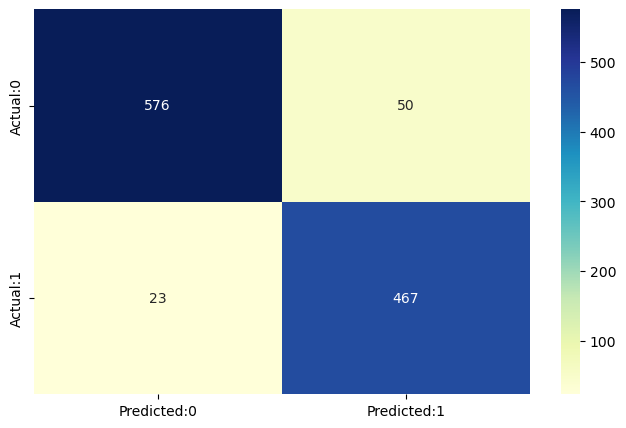

In [92]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")